![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# устанавливаем видимость всех колонок без пропусков
pd.set_option('display.max_columns', None)

from ast import literal_eval

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [5]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR + '/main_task.csv')
df_test = pd.read_csv(DATA_DIR + 'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR + '/sample_submission.csv')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [9]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [10]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # объединяем

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [14]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
16625,id_2651,Vienna,"['Austrian', 'European']",2653.0,$$ - $$$,NaN,"[[], []]",/Restaurant_Review-g190454-d12243652-Reviews-S...,d12243652,1,4.0
18107,id_3504,London,"['Mediterranean', 'European', 'Spanish', 'Vege...",3511.0,$$ - $$$,138.0,"[['Popular Friday night hang out', 'Local'], [...",/Restaurant_Review-g186338-d8146356-Reviews-Ca...,d8146356,1,4.0
25179,id_6828,Paris,"['French', 'Vietnamese']",6829.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d12816394-Reviews-B...,d12816394,1,5.0
5269,id_5269,Oporto,"['Barbecue', 'European', 'Portuguese']",1047.0,NaN,11.0,"[[], []]",/Restaurant_Review-g189180-d6767464-Reviews-Ch...,d6767464,0,0.0
24971,id_1685,Copenhagen,NaN,1690.0,NaN,4.0,"[['Moroccan influence'], ['08/19/2015']]",/Restaurant_Review-g189541-d6888591-Reviews-Ca...,d6888591,1,3.5


In [15]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(
    data['Number of Reviews']).astype('uint8')

In [17]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [24]:
# получаем сгруппированные данные, чтобы посчитать сколько в среднем просмотров в каждом городе
# .astype(float).round().astype(int) - позволяет округлить до целого и преобразовать в целое значение
# т.к. у просмотров не бывает дробных значений
# groupby_Number_of_Reviews = data.groupby(['City'])['Number of Reviews'].mean().astype(float).round().astype(int)
groupby_Number_of_Reviews = np.round(
    data.groupby(['City'])['Number of Reviews'].mean(), 0)
groupby_Number_of_Reviews

City
Amsterdam     149.0
Athens         94.0
Barcelona     136.0
Berlin         64.0
Bratislava     52.0
Brussels       93.0
Budapest      159.0
Copenhagen     95.0
Dublin        154.0
Edinburgh     238.0
Geneva         62.0
Hamburg        45.0
Helsinki       66.0
Krakow        131.0
Lisbon        128.0
Ljubljana      88.0
London        138.0
Luxembourg     83.0
Lyon           87.0
Madrid        100.0
Milan         168.0
Munich         78.0
Oporto        134.0
Oslo          100.0
Paris         117.0
Prague        124.0
Rome          290.0
Stockholm      75.0
Vienna         81.0
Warsaw         67.0
Zurich         73.0
Name: Number of Reviews, dtype: float64

In [70]:
# получаем индексы строк имеющие Nan в колонке 'Number of Reviews'
Index_Number_of_Reviews_Nan = data[data['Number of Reviews'].isnull()].index
Index_Number_of_Reviews_Nan

Int64Index([], dtype='int64')

In [65]:
# заполняем Nan средними значениями по городам
for i in Index_Number_of_Reviews_Nan:
    # получаем по индексу строки в data
    str_data = data.loc[i]
    # заполняем средними значениями
    data.loc[i, 'Number of Reviews'] = groupby_Number_of_Reviews[str_data['City']]
    # print(str_data['City'],groupby_Number_of_Reviews[str_data['City']])

In [71]:
# проверяем результат заполнения 'Number of Reviews'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              38410 non-null object
Ranking                    50000 non-null float64
Price Range                32639 non-null object
Number of Reviews          50000 non-null float64
Reviews                    49998 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


In [72]:
# обрабатываем признак 'Price Range'
unique_price_range = data['Price Range'].unique()
unique_price_range

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [73]:
# Сколько ресторанов относятся к среднему ценовому сегменту? - 23041
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [74]:
# заполняем средним значением, т.к. оно самое большое
data['Price Range'].fillna('$$ - $$$', inplace=True)

In [75]:
# проверяем результат заполнения 'Price Range'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              38410 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null object
Number of Reviews          50000 non-null float64
Reviews                    49998 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


In [76]:
# заполняем не заполненный признак 'Cuisine Style' как другой стиль Other
data['Cuisine Style'].fillna('["Other"]', inplace=True)

In [78]:
# проверяем результат заполнения 'Cuisine Style'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null object
Number of Reviews          50000 non-null float64
Reviews                    49998 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


In [77]:
# смотрим что получилось после преобразования
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
8114,id_8114,London,['French'],12019.0,$$ - $$$,6.0,"[[""Not actually a Paul's standard"", 'Not great...",/Restaurant_Review-g186338-d10501184-Reviews-P...,d10501184,0,0.0,0
30363,id_1509,Hamburg,['Indian'],1511.0,$$ - $$$,22.0,"[['Tasty and Good Service', 'Delicious Meal'],...",/Restaurant_Review-g187331-d9862411-Reviews-Ki...,d9862411,1,4.0,0
1668,id_1668,Budapest,"['European', 'Soups', 'Eastern European', 'Cen...",181.0,$$ - $$$,1402.0,"[['Delicious late breakfast!', 'Must try'], ['...",/Restaurant_Review-g274887-d1790459-Reviews-Fi...,d1790459,0,0.0,0
25849,id_1585,Lisbon,"['European', 'Portuguese']",1586.0,$,33.0,"[['Normal food', 'For fresh Fish Lovers'], ['0...",/Restaurant_Review-g189158-d6475670-Reviews-Ca...,d6475670,1,4.0,0
5810,id_5810,Lyon,['Wine Bar'],460.0,$$ - $$$,75.0,"[['Favorite wine bar', 'Nice place for a drink...",/Restaurant_Review-g187265-d3166094-Reviews-Ar...,d3166094,0,0.0,0


In [80]:
data.loc[5810]['Reviews']

"[['Favorite wine bar', 'Nice place for a drink'], ['10/04/2017', '06/24/2016']]"

In [79]:
# получаем строки имеющие Nan в колонке 'Number of Reviews'
Reviews_Nan = data[data['Reviews'].isnull()]
Reviews_Nan

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
8168,id_8168,Lisbon,"[""Other""]",3389.0,$$ - $$$,2.0,NaN,/Restaurant_Review-g189158-d12683988-Reviews-O...,d12683988,0,0.0,0
9608,id_9608,Vienna,"[""Other""]",1779.0,$$ - $$$,81.0,NaN,/Restaurant_Review-g190454-d12605368-Reviews-R...,d12605368,0,0.0,1


In [81]:
# заполняем фиктивным отзывом, даты одинаковые чтобы в итоге разница между ними была равна 0
fictitious_reviews = "[['fictitious reviews', 'fictitious reviews'], ['01/01/2000', '01/01/2000']]"
data['Reviews'].fillna(fictitious_reviews, inplace=True)

In [82]:
# проверяем результат заполнения 'Reviews'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null object
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(1)
memory usage: 4.2+ MB


In [83]:
# смотрим что получилось после преобразования
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
48126,id_9175,London,"[""Other""]",9184.0,$$ - $$$,138.0,"[['Used to pop in....'], ['01/31/2017']]",/Restaurant_Review-g186338-d5617536-Reviews-Im...,d5617536,1,5.0,1
49399,id_4590,London,"['International', 'Bar', 'British', 'Contempor...",4598.0,$$ - $$$,137.0,"[['Passable food...great atmosphere', 'Cool pl...",/Restaurant_Review-g186338-d733322-Reviews-Bri...,d733322,1,4.0,0
48110,id_1443,Milan,"['Italian', 'Mediterranean', 'Seafood', 'Veget...",1445.0,$$ - $$$,305.0,"[['Disappointed', 'Good food nice atmosphere']...",/Restaurant_Review-g187849-d2205127-Reviews-Ri...,d2205127,1,4.0,0
40030,id_15742,London,"[""Other""]",15754.0,$$ - $$$,10.0,"[['Incompetent manager and bad training', 'Ama...",/Restaurant_Review-g186338-d4919408-Reviews-Mc...,d4919408,1,2.5,0
5871,id_5871,Barcelona,['Spanish'],6708.0,$$ - $$$,111.0,"[['Maremagnum', 'Super beautiful'], ['12/01/20...",/Restaurant_Review-g187497-d3353664-Reviews-Ma...,d3353664,0,0.0,0


Первичная очистка данных - избавление от Nan - завершена


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [84]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    3
Number of Reviews           1573
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

In [85]:
data.describe(include=['object'])

,Restaurant_id,City,Cuisine Style,Price Range,Reviews,URL_TA,ID_TA
count,50000,50000,50000,50000,50000,50000,50000
unique,13094,31,10732,3,41858,49963,49963
top,id_227,London,"[""Other""]",$$ - $$$,"[[], []]",/Restaurant_Review-g187514-d7337366-Reviews-La...,d13002276
freq,19,7193,11590,40402,8112,2,2


Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [ ]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
# data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)
#  городам дадим уникальный код, это более правильно, чем делать по ним dummy-переменные

In [86]:
# с применением sklearn.preprocessign.LabelEncoder
cities_le = LabelEncoder()
cities_le.fit(data['City'])
data['City Code'] = cities_le.transform(data['City'])

In [87]:
# смотрим что получилось после преобразования
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code
42939,id_2776,Milan,"['Italian', 'Mexican', 'American', 'Fast Food'...",2778.0,$,50.0,"[['Awesome!'], ['10/10/2012']]",/Restaurant_Review-g187849-d3431511-Reviews-La...,d3431511,1,4.0,0,20
19822,id_11098,London,['British'],11108.0,$$ - $$$,11.0,"[['Hard to find a good local these days', 'Sav...",/Restaurant_Review-g186338-d6609366-Reviews-Su...,d6609366,1,3.5,0,16
4136,id_4136,Rome,"['Italian', 'Seafood']",2722.0,$$$$,26.0,"[['Splendid!!', 'Very good'], ['07/28/2017', '...",/Restaurant_Review-g187791-d12559508-Reviews-F...,d12559508,0,0.0,0,26
9707,id_9707,Milan,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ve...",1456.0,$$ - $$$,859.0,"[['Best Indian restaurant in Milan', 'Indian a...",/Restaurant_Review-g187849-d2020581-Reviews-Bh...,d2020581,0,0.0,0,20
47351,id_6583,Barcelona,['Spanish'],6584.0,$$ - $$$,7.0,"[[], []]",/Restaurant_Review-g187497-d6751090-Reviews-PA...,d6751090,1,3.5,0,2


In [88]:
# получаем сгруппированные данные, чтобы посчитать сколько ресторанов в каждом городе
groupby_Restaurant_id = data.groupby(['City'])['Restaurant_id'].count()
groupby_Restaurant_id

City
Amsterdam     1372
Athens         776
Barcelona     3395
Berlin        2705
Bratislava     380
Brussels      1314
Budapest      1021
Copenhagen     819
Dublin         836
Edinburgh      745
Geneva         590
Hamburg       1186
Helsinki       475
Krakow         554
Lisbon        1647
Ljubljana      222
London        7193
Luxembourg     263
Lyon          1126
Madrid        3813
Milan         2694
Munich        1145
Oporto         642
Oslo           488
Paris         6108
Prague        1816
Rome          2589
Stockholm     1033
Vienna        1443
Warsaw         925
Zurich         685
Name: Restaurant_id, dtype: int64

In [89]:
# заполняем в новый признак количество ресторанов в городе
def get_rest_count_incity(City):
    return groupby_Restaurant_id[City]


data['CountRestaurantsInCity'] = data.City.apply(
    lambda s: get_rest_count_incity(s))

In [90]:
# смотрим что получилось после преобразования
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code,CountRestaurantsInCity
18233,id_997,Stockholm,['Pizza'],998.0,$$ - $$$,73.0,"[['Average pizza hut', 'Great pizza for a fair...",/Restaurant_Review-g189852-d5936419-Reviews-Pi...,d5936419,1,3.5,0,27,1033
36836,id_1273,Prague,"['Bar', 'Pub', 'Czech', 'Central European', 'E...",1274.0,$,57.0,"[['Worst place in all of Prague for tourists',...",/Restaurant_Review-g274707-d2308829-Reviews-Na...,d2308829,1,4.0,0,25,1816
31444,id_3952,Barcelona,['Spanish'],3953.0,$,10.0,"[['Menu del dia-menu of the day', 'Great lunch...",/Restaurant_Review-g187497-d8566268-Reviews-Re...,d8566268,1,4.5,0,2,3395
14213,id_1662,Dublin,"[""Other""]",1666.0,$$ - $$$,5.0,"[['Sunday business lunch', 'Filipino food at i...",/Restaurant_Review-g186605-d5821547-Reviews-Ma...,d5821547,1,4.0,0,8,836
2559,id_2559,London,"['Mediterranean', 'Barbecue', 'Turkish', 'Midd...",1525.0,$$ - $$$,518.0,"[['Loved it', 'Great light lunch on a weekday'...",/Restaurant_Review-g186338-d1006776-Reviews-Me...,d1006776,0,0.0,0,16,7193


In [91]:
# проверяем результат заполнения 'CountRestaurantsInCity'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null object
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
City Code                  50000 non-null int64
CountRestaurantsInCity     50000 non-null int64
dtypes: float64(3), int64(3), object(7), uint8(1)
memory usage: 5.0+ MB


In [92]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'Number_of_Reviews_isNAN', 'City Code', 'CountRestaurantsInCity'],
      dtype='object')

In [93]:
# добавляем новый признак рейтинг в городе среди других ресторанов города
data['RankingInCity'] = data['Ranking'] / data['CountRestaurantsInCity']

In [94]:
# смотрим что получилось после преобразования
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code,CountRestaurantsInCity,RankingInCity
6597,id_6597,Vienna,"['Austrian', 'European']",1631.0,$$ - $$$,8.0,"[['Local experience without tourist price', 'V...",/Restaurant_Review-g190454-d4148487-Reviews-Wa...,d4148487,0,0.0,0,28,1443,1.130284
44233,id_793,Oslo,['International'],794.0,$,15.0,"[['Good pool bar', 'Level Table!'], ['02/25/20...",/Restaurant_Review-g190479-d811852-Reviews-Bud...,d811852,1,3.5,0,23,488,1.627049
303,id_303,Prague,['French'],1262.0,$$ - $$$,12.0,"[['Very good vines', ""Didn't eat here but GREA...",/Restaurant_Review-g274707-d9744276-Reviews-Ch...,d9744276,0,0.0,0,25,1816,0.694934
44000,id_1111,Paris,"['French', 'European', 'Vegetarian Friendly']",1112.0,$$ - $$$,174.0,"[['Should Have Come Before', 'Superb Service']...",/Restaurant_Review-g187147-d1405651-Reviews-Le...,d1405651,1,4.5,0,24,6108,0.182056
3813,id_3813,Vienna,"['Austrian', 'Cafe', 'Central European', 'Euro...",2912.0,$$ - $$$,76.0,[['CAUTION - several reviews here are for wro....,/Restaurant_Review-g190454-d5890458-Reviews-Ca...,d5890458,0,0.0,0,28,1443,2.018018


#### Возьмем следующий признак "Price Range".

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [ ]:
# Ваша обработка 'Price Range'

In [95]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [96]:
# превратим в список 1,2,3 значение 'Price Range'
price_range_dict = {
    '$': 1,
    '$$ - $$$': 2,
    '$$$$': 3
}

data['Price Range'] = data['Price Range'].map(price_range_dict)

In [97]:
# смотрим что получилось после преобразования
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code,CountRestaurantsInCity,RankingInCity
37580,id_1618,Lyon,"[""Other""]",1619.0,2,2.0,"[[], []]",/Restaurant_Review-g187265-d12367828-Reviews-L...,d12367828,1,4.5,0,18,1126,1.437833
14114,id_16194,London,['Cafe'],16206.0,2,36.0,"[['Bad service', 'OMG - it was soooo expensive...",/Restaurant_Review-g186338-d8154498-Reviews-Ca...,d8154498,1,2.0,0,16,7193,2.253024
29690,id_4825,Berlin,"['Chinese', 'Japanese', 'Sushi', 'Asian']",4827.0,2,44.0,"[['Good price but ambiguous flavors', 'High qu...",/Restaurant_Review-g187323-d1776817-Reviews-Sa...,d1776817,1,3.5,0,3,2705,1.784473
6870,id_6870,Milan,['Italian'],3217.0,2,22.0,"[['Visit at Milan', 'Best tiramisu'], ['07/30/...",/Restaurant_Review-g187849-d2620195-Reviews-Me...,d2620195,0,0.0,0,20,2694,1.194135
30954,id_497,Zurich,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",500.0,2,192.0,"[['Fresh Sushi', 'Fresh , limited and expensiv...",/Restaurant_Review-g188113-d4960222-Reviews-Yo...,d4960222,1,3.5,0,30,685,0.729927


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

# Работаем со стилями кухни

In [98]:
# смотрим что лежит в колонке 'Cuisine Style'
Cuisine_Style_series = data['Cuisine Style'].unique()
Cuisine_Style_series

array(["['Bar', 'Pub']",
       "['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']",
       "['Vegetarian Friendly']", ...,
       "['Steakhouse', 'Barbecue', 'Australian', 'Argentinean', 'South American']",
       "['French', 'American', 'Cafe', 'Healthy', 'Soups']",
       "['French', 'Contemporary', 'Fusion', 'Gastropub']"], dtype=object)

In [99]:
# составляем список стилей кухни
cousine_list = []

for i in Cuisine_Style_series:
    if type(i) != type(2.0):
        # [1:-1] - убираем символы '[' и ']' - т.к. это строки
        #print(i[1:-1])
        # получаем датафрейм с отдельными значениями
        df_cuisine = pd.DataFrame(i[1:-1].split(','))
        # преобразуем в список
        list_cuisine = df_cuisine[0].tolist()
        # print(list_cuisine)
        # перебираем значения в получившемся списке
        for s in list_cuisine:
            # получаем каждое значение и снова убираем символы кавычек и лишние пробелы
            cuisine = s[1:-1].strip()
            if cuisine.startswith("'"):
                cuisine = cuisine.replace("'",'')
            #print(s, cuisine)
            # проверяем наличие cuisine в cousine_list
            if cuisine in cousine_list:
                continue
            else:
                #print(cousine_list, cuisine)
                # добавлем это значение в список кухонь
                cousine_list.append(cuisine)
                
# длина списка кухонь
lenght_cousine_list = len(cousine_list)

# -1 потому что один был добавлен вместо NaN и его не было в датасете изначально
print('количество стилей кухонь', lenght_cousine_list-1)                
cousine_list


количество стилей кухонь 125


['Bar',
 'Pub',
 'European',
 'Scandinavian',
 'Gluten Free Options',
 'Vegetarian Friendly',
 'Vegan Options',
 'Italian',
 'Mediterranean',
 'Seafood',
 'French',
 'Cafe',
 'Fast Food',
 'Portuguese',
 'Other',
 'Greek',
 'Czech',
 'Eastern European',
 'Central European',
 'Pizza',
 'British',
 'Spanish',
 'Norwegian',
 'African',
 'Moroccan',
 'Middle Eastern',
 'Halal',
 'Indian',
 'Thai',
 'Dutch',
 'Welsh',
 'American',
 'Steakhouse',
 'Soups',
 'Scottish',
 'Fusion',
 'Street Food',
 'Hungarian',
 'Asian',
 'Wine Bar',
 'Barbecue',
 'Central American',
 'Peruvian',
 'South American',
 'Irish',
 'Polish',
 'Vietnamese',
 'Lebanese',
 'Turkish',
 'Healthy',
 'Japanese',
 'Sushi',
 'Austrian',
 'Chinese',
 'Danish',
 'International',
 'Gastropub',
 'Korean',
 'German',
 'Contemporary',
 'Arabic',
 'Diner',
 'Swiss',
 'Swedish',
 'Persian',
 'Australian',
 'Grill',
 'Mexican',
 'Latin',
 'Belgian',
 'Argentinean',
 'Tunisian',
 'Russian',
 'Nepali',
 'Bangladeshi',
 'Colombian',
 'S

In [100]:
# создаем dummy-перерменные из стилей кухни

for i in range(lenght_cousine_list):
    column_name = cousine_list[i]
    # создаём и заполняем колонки с жанрами
    data[column_name] = data['Cuisine Style'].apply(lambda s: 1
                                                    if column_name in str(s) else 0)

In [101]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code,CountRestaurantsInCity,RankingInCity,Bar,Pub,European,Scandinavian,Gluten Free Options,Vegetarian Friendly,Vegan Options,Italian,Mediterranean,Seafood,French,Cafe,Fast Food,Portuguese,Other,Greek,Czech,Eastern European,Central European,Pizza,British,Spanish,Norwegian,African,Moroccan,Middle Eastern,Halal,Indian,Thai,Dutch,Welsh,American,Steakhouse,Soups,Scottish,Fusion,Street Food,Hungarian,Asian,Wine Bar,Barbecue,Central American,Peruvian,South American,Irish,Polish,Vietnamese,Lebanese,Turkish,Healthy,Japanese,Sushi,Austrian,Chinese,Danish,International,Gastropub,Korean,German,Contemporary,Arabic,Diner,Swiss,Swedish,Persian,Australian,Grill,Mexican,Latin,Belgian,Argentinean,Tunisian,Russian,Nepali,Bangladeshi,Colombian,Sri Lankan,Pakistani,Brew Pub,Israeli,Brazilian,Delicatessen,Kosher,Ethiopian,Taiwanese,Indonesian,Malaysian,Venezuelan,Balti,Armenian,Slovenian,Caribbean,Jamaican,Ecuadorean,Chilean,Hawaiian,Minority Chinese,Croatian,Cambodian,Afghani,Tibetan,Romanian,Southwestern,Mongolian,Cajun & Creole,Singaporean,Filipino,Cuban,Native American,Canadian,Egyptian,Azerbaijani,Georgian,Yunnan,New Zealand,Ukrainian,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian
17146,id_8497,Madrid,['American'],8504.0,2,100.0,"[[], []]",/Restaurant_Review-g187514-d12595830-Reviews-K...,d12595830,1,2.0,1,19,3813,2.230265,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38572,id_11751,Paris,"[""Other""]",11753.0,2,10.0,"[['Bad', 'Good traditional flavours'], ['10/16...",/Restaurant_Review-g187147-d1336070-Reviews-Le...,d1336070,1,4.0,0,24,6108,1.924198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25560,id_1934,Budapest,"['European', 'Hungarian']",1935.0,2,2.0,"[[], []]",/Restaurant_Review-g274887-d4607177-Reviews-Ka...,d4607177,1,4.0,0,6,1021,1.895201,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43632,id_887,Bratislava,"['European', 'Eastern European', 'Armenian']",889.0,1,52.0,"[[], []]",/Restaurant_Review-g274924-d11822289-Reviews-I...,d11822289,1,1.0,1,4,380,2.339474,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38301,id_190,Luxembourg,"['French', 'European']",191.0,2,56.0,"[['Authentique pleasure!', 'A little gem!'], [...",/Restaurant_Review-g190356-d4786771-Reviews-Br...,d4786771,1,4.0,0,17,263,0.726236,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
# получаем колонки стилей, которые мы создали в датасете как Dummy-переменные
# чтобы по ним посчитать итоговое количество кухонь в каждом ресторане
df_dummies = pd.get_dummies(cousine_list)
df_dummies.columns

Index(['Afghani', 'African', 'Albanian', 'American', 'Arabic', 'Argentinean',
       'Armenian', 'Asian', 'Australian', 'Austrian',
       ...
       'Ukrainian', 'Uzbek', 'Vegan Options', 'Vegetarian Friendly',
       'Venezuelan', 'Vietnamese', 'Welsh', 'Wine Bar', 'Xinjiang', 'Yunnan'],
      dtype='object', length=126)

In [103]:
# проводим подсчет итогового количества кухонь в ресторане
# если не было в датасете то она будет посчитана как Other
data['total_cuisine'] = data[df_dummies.columns].sum(axis=1)
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code,CountRestaurantsInCity,RankingInCity,Bar,Pub,European,Scandinavian,Gluten Free Options,Vegetarian Friendly,Vegan Options,Italian,Mediterranean,Seafood,French,Cafe,Fast Food,Portuguese,Other,Greek,Czech,Eastern European,Central European,Pizza,British,Spanish,Norwegian,African,Moroccan,Middle Eastern,Halal,Indian,Thai,Dutch,Welsh,American,Steakhouse,Soups,Scottish,Fusion,Street Food,Hungarian,Asian,Wine Bar,Barbecue,Central American,Peruvian,South American,Irish,Polish,Vietnamese,Lebanese,Turkish,Healthy,Japanese,Sushi,Austrian,Chinese,Danish,International,Gastropub,Korean,German,Contemporary,Arabic,Diner,Swiss,Swedish,Persian,Australian,Grill,Mexican,Latin,Belgian,Argentinean,Tunisian,Russian,Nepali,Bangladeshi,Colombian,Sri Lankan,Pakistani,Brew Pub,Israeli,Brazilian,Delicatessen,Kosher,Ethiopian,Taiwanese,Indonesian,Malaysian,Venezuelan,Balti,Armenian,Slovenian,Caribbean,Jamaican,Ecuadorean,Chilean,Hawaiian,Minority Chinese,Croatian,Cambodian,Afghani,Tibetan,Romanian,Southwestern,Mongolian,Cajun & Creole,Singaporean,Filipino,Cuban,Native American,Canadian,Egyptian,Azerbaijani,Georgian,Yunnan,New Zealand,Ukrainian,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,total_cuisine
25102,id_2557,Amsterdam,"['Italian', 'Vegetarian Friendly']",2564.0,2,5.0,"[['Poor'], ['08/24/2017']]",/Restaurant_Review-g188590-d12657816-Reviews-B...,d12657816,1,4.0,0,0,1372,1.868805,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
13124,id_5064,Paris,"[""Other""]",5065.0,2,35.0,"[['Made our night whilst in Paris', 'Noisy fam...",/Restaurant_Review-g187147-d6697361-Reviews-Ca...,d6697361,1,4.0,0,24,6108,0.829240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11856,id_12813,Paris,"['French', 'Vegetarian Friendly']",12815.0,2,76.0,"[['Catman, Salty Man', 'Good, affordable wine ...",/Restaurant_Review-g187147-d2718275-Reviews-Cr...,d2718275,1,2.5,0,24,6108,2.098068,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4635,id_4635,Oporto,"[""Other""]",1086.0,2,4.0,"[[], []]",/Restaurant_Review-g189180-d12834138-Reviews-T...,d12834138,0,0.0,0,22,642,1.691589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22717,id_1780,Stockholm,"[""Other""]",1783.0,2,4.0,"[[], []]",/Restaurant_Review-g189852-d12130136-Reviews-T...,d12130136,1,4.0,0,27,1033,1.726041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Работаем с отзывами, вытаскиваем из них даты

In [104]:
# определяем маску поиска, выделяем  только даты в отдельную колонку
data['dates_of_review'] = data['Reviews'].str.findall('\d\d\S\d\d\S\d\d\d\d')

In [105]:
# проверяем результат после преобразований
data.sample(11)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code,CountRestaurantsInCity,RankingInCity,Bar,Pub,European,Scandinavian,Gluten Free Options,Vegetarian Friendly,Vegan Options,Italian,Mediterranean,Seafood,French,Cafe,Fast Food,Portuguese,Other,Greek,Czech,Eastern European,Central European,Pizza,British,Spanish,Norwegian,African,Moroccan,Middle Eastern,Halal,Indian,Thai,Dutch,Welsh,American,Steakhouse,Soups,Scottish,Fusion,Street Food,Hungarian,Asian,Wine Bar,Barbecue,Central American,Peruvian,South American,Irish,Polish,Vietnamese,Lebanese,Turkish,Healthy,Japanese,Sushi,Austrian,Chinese,Danish,International,Gastropub,Korean,German,Contemporary,Arabic,Diner,Swiss,Swedish,Persian,Australian,Grill,Mexican,Latin,Belgian,Argentinean,Tunisian,Russian,Nepali,Bangladeshi,Colombian,Sri Lankan,Pakistani,Brew Pub,Israeli,Brazilian,Delicatessen,Kosher,Ethiopian,Taiwanese,Indonesian,Malaysian,Venezuelan,Balti,Armenian,Slovenian,Caribbean,Jamaican,Ecuadorean,Chilean,Hawaiian,Minority Chinese,Croatian,Cambodian,Afghani,Tibetan,Romanian,Southwestern,Mongolian,Cajun & Creole,Singaporean,Filipino,Cuban,Native American,Canadian,Egyptian,Azerbaijani,Georgian,Yunnan,New Zealand,Ukrainian,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,total_cuisine,dates_of_review
2089,id_2089,Rome,['Fusion'],3879.0,2,7.0,"[[], []]",/Restaurant_Review-g187791-d13297130-Reviews-G...,d13297130,0,0.0,0,26,2589,1.498262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,[]
27327,id_2823,Berlin,['Grill'],2825.0,3,3.0,"[[], []]",/Restaurant_Review-g187323-d12177912-Reviews-A...,d12177912,1,5.0,0,3,2705,1.044362,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,[]
42099,id_7606,London,"['Cafe', 'Turkish', 'Vegetarian Friendly', 'Gl...",7615.0,2,62.0,"[['Trendy place', 'Nice cakes!'], ['11/06/2017...",/Restaurant_Review-g186338-d1014681-Reviews-Ca...,d1014681,1,4.0,0,16,7193,1.058668,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,"[11/06/2017, 09/30/2017]"
48881,id_7638,Paris,"['French', 'Bar', 'Cafe', 'European']",7639.0,2,238.0,[['Great place to stop for a beer and a burge....,/Restaurant_Review-g187147-d3292788-Reviews-Ma...,d3292788,1,3.5,0,24,6108,1.250655,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,"[11/14/2017, 06/05/2017]"
47887,id_683,Geneva,['Turkish'],686.0,1,7.0,"[['Good yogurt and amazing prices'], ['07/20/2...",/Restaurant_Review-g188057-d11892656-Reviews-M...,d11892656,1,4.5,0,10,590,1.162712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,[07/20/2017]
33033,id_2785,Barcelona,"['Chinese', 'Asian', 'Vietnamese', 'Vegetarian...",2786.0,2,132.0,"[['Changed management, not Vietnamese anymore....",/Restaurant_Review-g187497-d1074510-Reviews-Ha...,d1074510,1,4.0,0,2,3395,0.820619,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [106]:
# получаем минимальную и максимальную даты отзывов в пустые списики получам одинаковую дату чтобы при вычитании был 0
data['data1'] = data['dates_of_review'].apply(lambda s: pd.to_datetime(s).min()
                                              if type(s) == type(cousine_list) and
                                              len(s) > 0 else pd.to_datetime('01/01/2000'))
data['data2'] = data['dates_of_review'].apply(lambda s: pd.to_datetime(s).max()
                                              if type(s) == type(cousine_list) and
                                              len(s) > 0 else pd.to_datetime('01/01/2000'))

In [107]:
# проверяем результат после преобразований
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code,CountRestaurantsInCity,RankingInCity,Bar,Pub,European,Scandinavian,Gluten Free Options,Vegetarian Friendly,Vegan Options,Italian,Mediterranean,Seafood,French,Cafe,Fast Food,Portuguese,Other,Greek,Czech,Eastern European,Central European,Pizza,British,Spanish,Norwegian,African,Moroccan,Middle Eastern,Halal,Indian,Thai,Dutch,Welsh,American,Steakhouse,Soups,Scottish,Fusion,Street Food,Hungarian,Asian,Wine Bar,Barbecue,Central American,Peruvian,South American,Irish,Polish,Vietnamese,Lebanese,Turkish,Healthy,Japanese,Sushi,Austrian,Chinese,Danish,International,Gastropub,Korean,German,Contemporary,Arabic,Diner,Swiss,Swedish,Persian,Australian,Grill,Mexican,Latin,Belgian,Argentinean,Tunisian,Russian,Nepali,Bangladeshi,Colombian,Sri Lankan,Pakistani,Brew Pub,Israeli,Brazilian,Delicatessen,Kosher,Ethiopian,Taiwanese,Indonesian,Malaysian,Venezuelan,Balti,Armenian,Slovenian,Caribbean,Jamaican,Ecuadorean,Chilean,Hawaiian,Minority Chinese,Croatian,Cambodian,Afghani,Tibetan,Romanian,Southwestern,Mongolian,Cajun & Creole,Singaporean,Filipino,Cuban,Native American,Canadian,Egyptian,Azerbaijani,Georgian,Yunnan,New Zealand,Ukrainian,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,total_cuisine,dates_of_review,data1,data2
41712,id_10769,London,"[""Other""]",10779.0,2,2.0,"[['Post Ride Juice', 'Great smoothies'], ['04/...",/Restaurant_Review-g186338-d8802036-Reviews-En...,d8802036,1,4.5,0,16,7193,1.498540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[04/07/2016, 11/08/2015]",2015-11-08,2016-04-07
37596,id_1287,Geneva,"[""Other""]",1293.0,2,5.0,"[['Cosy chinese restaurant.', '9.5 francs for ...",/Restaurant_Review-g188057-d12071597-Reviews-J...,d12071597,1,3.0,0,10,590,2.191525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[12/13/2017, 11/07/2017]",2017-11-07,2017-12-13
8838,id_8838,Prague,"['Indian', 'Asian', 'Nepali', 'Vegetarian Frie...",362.0,2,74.0,"[['Great food, friendly service', 'Afternoon m...",/Restaurant_Review-g274707-d8389392-Reviews-In...,d8389392,0,0.0,0,25,1816,0.199339,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,"[12/10/2017, 11/07/2017]",2017-11-07,2017-12-10
26368,id_900,Dublin,"['Cafe', 'Vegetarian Friendly']",902.0,1,24.0,"[['Family visit after seeing Santa', 'Homely b...",/Restaurant_Review-g186605-d8319717-Reviews-Th...,d8319717,1,4.5,0,8,836,1.078947,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,"[12/12/2017, 09/30/2017]",2017-09-30,2017-12-12
13594,id_4503,Rome,"['Italian', 'Delicatessen']",4504.0,2,22.0,"[['Good service', 'stiff boss and poor wine se...",/Restaurant_Review-g187791-d6909695-Reviews-L_...,d6909695,1,4.5,0,26,2589,1.739668,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,"[08/05/2016, 11/13/2014]",2014-11-13,2016-08-05


In [108]:
# считаем разницу в датах
data['Timedelta'] = data['data2'] - data['data1']

In [109]:
# преобразуем и разницу в днях к числу, иначе МО не работает
data['Timedelta'] = data.Timedelta.apply(lambda s: s.days)

In [110]:
# проверяем результат после преобразований
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,City Code,CountRestaurantsInCity,RankingInCity,Bar,Pub,European,Scandinavian,Gluten Free Options,Vegetarian Friendly,Vegan Options,Italian,Mediterranean,Seafood,French,Cafe,Fast Food,Portuguese,Other,Greek,Czech,Eastern European,Central European,Pizza,British,Spanish,Norwegian,African,Moroccan,Middle Eastern,Halal,Indian,Thai,Dutch,Welsh,American,Steakhouse,Soups,Scottish,Fusion,Street Food,Hungarian,Asian,Wine Bar,Barbecue,Central American,Peruvian,South American,Irish,Polish,Vietnamese,Lebanese,Turkish,Healthy,Japanese,Sushi,Austrian,Chinese,Danish,International,Gastropub,Korean,German,Contemporary,Arabic,Diner,Swiss,Swedish,Persian,Australian,Grill,Mexican,Latin,Belgian,Argentinean,Tunisian,Russian,Nepali,Bangladeshi,Colombian,Sri Lankan,Pakistani,Brew Pub,Israeli,Brazilian,Delicatessen,Kosher,Ethiopian,Taiwanese,Indonesian,Malaysian,Venezuelan,Balti,Armenian,Slovenian,Caribbean,Jamaican,Ecuadorean,Chilean,Hawaiian,Minority Chinese,Croatian,Cambodian,Afghani,Tibetan,Romanian,Southwestern,Mongolian,Cajun & Creole,Singaporean,Filipino,Cuban,Native American,Canadian,Egyptian,Azerbaijani,Georgian,Yunnan,New Zealand,Ukrainian,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,total_cuisine,dates_of_review,data1,data2,Timedelta
19787,id_425,Edinburgh,"['Japanese', 'Sushi', 'Asian', 'Vegetarian Fri...",426.0,2,293.0,"[['Fantastic takeaway', 'Love love loved it!']...",/Restaurant_Review-g186525-d783373-Reviews-Sus...,d783373,1,4.5,0,9,745,0.571812,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,"[01/06/2018, 01/04/2018]",2018-01-04,2018-01-06,2
28575,id_3328,London,"['Italian', 'Pizza', 'Vegetarian Friendly']",3335.0,2,198.0,"[['Great Naples style food', 'Still Excellent'...",/Restaurant_Review-g186338-d4834255-Reviews-Ad...,d4834255,1,4.5,0,16,7193,0.463645,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"[12/22/2017, 12/17/2017]",2017-12-17,2017-12-22,5
24928,id_5361,Rome,['Bar'],5363.0,2,35.0,"[['Accidental stop-off - very friendly!', 'Nic...",/Restaurant_Review-g187791-d7963978-Reviews-Ba...,d7963978,1,4.0,0,26,2589,2.071456,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[12/27/2016, 03/20/2016]",2016-03-20,2016-12-27,282
18510,id_632,Munich,"[""Other""]",639.0,2,28.0,"[['The store for mens clothing in Munich', 'Ni...",/Restaurant_Review-g187309-d9600857-Reviews-Hi...,d9600857,1,4.5,0,21,1145,0.558079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[04/22/2017, 03/30/2017]",2017-03-30,2017-04-22,23
33946,id_15186,London,"['Bar', 'Pub', 'Gastropub']",15198.0,2,18.0,"[['NICE BUT PRICY', 'Great early evening dinne...",/Restaurant_Review-g186338-d8463675-Reviews-De...,d8463675,1,3.0,0,16,7193,2.112888,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"[04/10/2017, 03/29/2016]",2016-03-29,2017-04-10,377


In [128]:
# создаём новый столбец IdTa, в который записываем только цифры из ID_TA и преобразуем их в целое число
# т.к. в модель можно отправить только числа, а нам потом нужен идентификатор чтобы понять к какому ресторану это относится
data['IdTa'] = data.ID_TA.apply(lambda s: int(s.replace('d', ''))
                                if s.startswith('d') else int(s))

In [129]:
# проверяем результат заполнения 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
IdTa                 50000 non-null int64
dtypes: float64(3), int64(2), object(7)
memory usage: 4.6+ MB


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

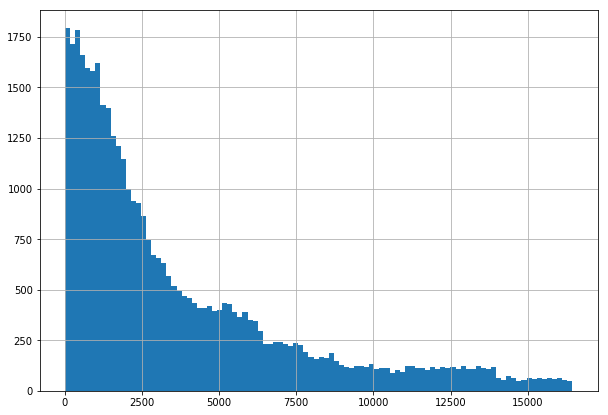

In [112]:
plt.rcParams['figure.figsize'] = (10, 7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

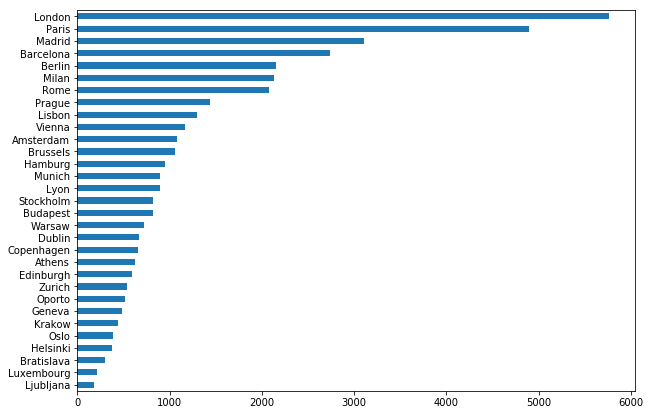

In [113]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

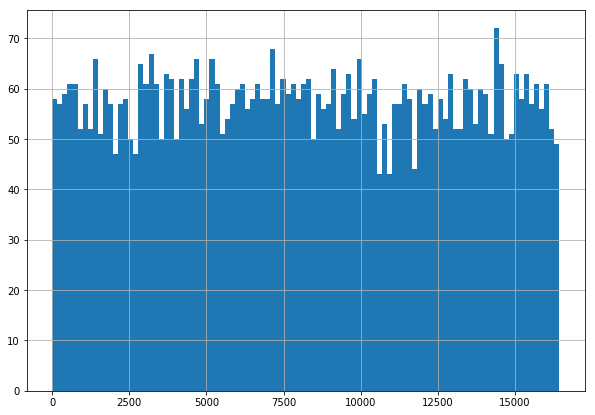

In [114]:
df_train['Ranking'][df_train['City'] == 'London'].hist(bins=100)

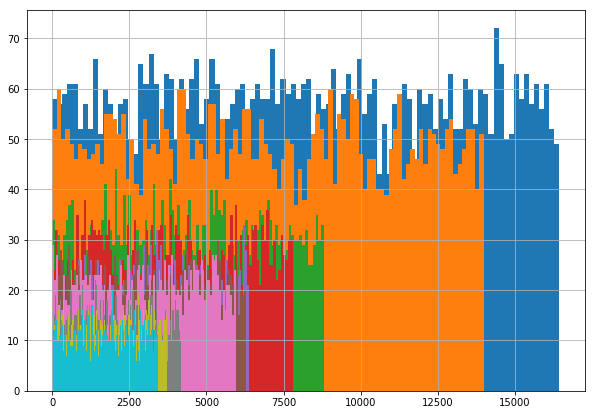

In [115]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


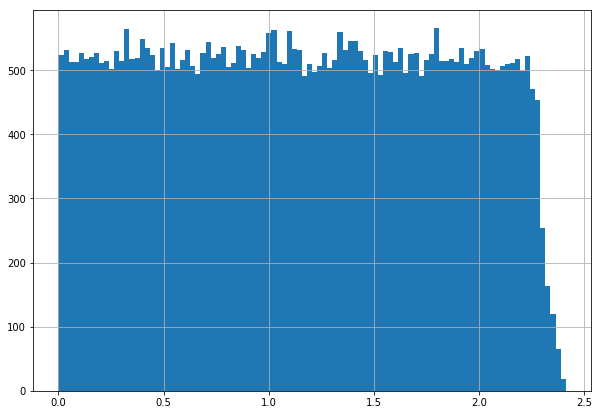

In [118]:
# как видим рейтинг по городам более правильный чем общий рейтинг
plt.rcParams['figure.figsize'] = (10, 7)
data['RankingInCity'].hist(bins=100)

### Посмотрим распределение целевой переменной

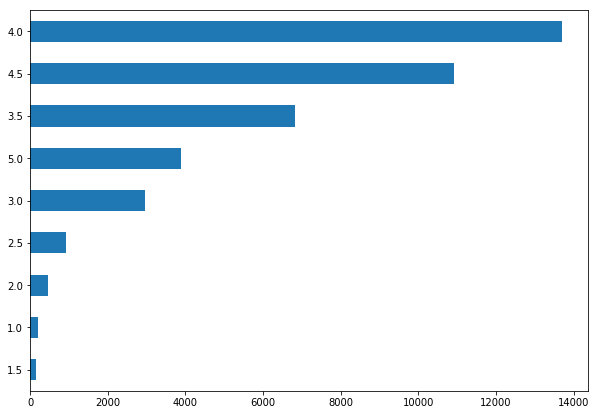

In [102]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

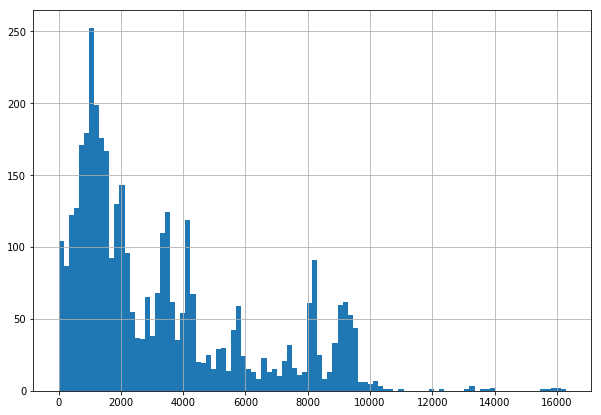

In [103]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

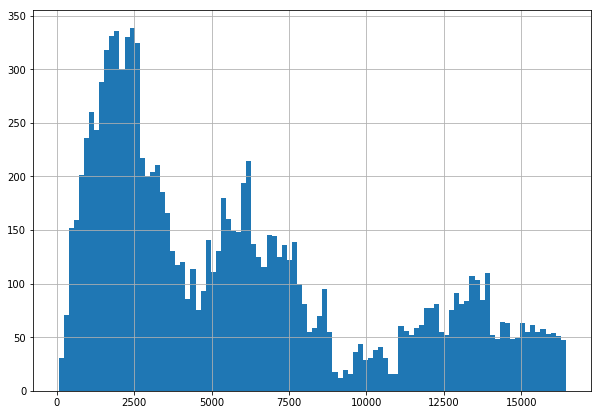

In [104]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

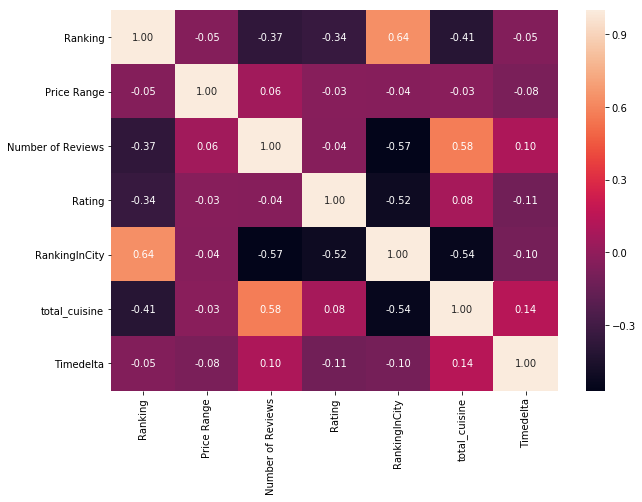

In [126]:
cols = ["City", "Ranking", "Price Range", "Number of Reviews", "Rating",
        "City", "RankingInCity", "total_cuisine", "Timedelta"]
corr = data.loc[data["sample"] == 1, cols].corr(method="spearman")

sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Больше всего коррелирует исхолдный признак Ranking с полученным и более точным признаком RankingInCity. Потому из ОМ удалим признак Ranking

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [130]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1  # помечаем где у нас трейн
df_test['sample'] = 0  # помечаем где у нас тест
# в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [133]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''

    df_output = df_input.copy()

    # ################### 1. NAN ##############################################################

    # заполняем значения NAN в колонке 'Number of Reviews'
    # получаем сгруппированные данные, чтобы посчитать сколько в среднем просмотров в каждом городе
    groupby_Number_of_Reviews = np.round(
        df_output.groupby(['City'])['Number of Reviews'].mean(), 0)
    # получаем индексы строк имеющие Nan в колонке 'Number of Reviews'
    Index_Number_of_Reviews_Nan = df_output[
        df_output['Number of Reviews'].isnull()].index
    # заполняем Nan средними значениями по городам
    for i in Index_Number_of_Reviews_Nan:
        # получаем по индексу строки в data
        str_data = df_output.loc[i]
        # заполняем средними значениями
        df_output.loc[i, 'Number of Reviews'] = groupby_Number_of_Reviews[
            str_data['City']]

    # заполняем значения NAN в колонке 'Price Range'
    # заполняем средним значением, т.к. оно самое большое
    df_output['Price Range'].fillna('$$ - $$$', inplace=True)

    # заполняем значения NAN в колонке 'Cuisine Style'
    # заполняем не заполненный признак 'Cuisine Style' как другой стиль Other
    df_output['Cuisine Style'].fillna('["Other"]', inplace=True)

    # заполняем значения NAN в колонке 'Reviews'
    # заполняем фиктивным отзывом, даты одинаковые чтобы в итоге разница между ними была равна 0
    fictitious_reviews = "[['fictitious reviews', 'fictitious reviews'], ['01/01/2000', '01/01/2000']]"
    df_output['Reviews'].fillna(fictitious_reviews, inplace=True)

    # ################### 2. Feature Engineering ####################################################

    # Новый признак 'City Code'
    # с применением sklearn.preprocessign.LabelEncoder присваиваем код городам 'City Code'
    cities_le = LabelEncoder()
    cities_le.fit(df_output['City'])
    df_output['City Code'] = cities_le.transform(df_output['City'])

    # Новый признак 'CountRestaurantsInCity'
    # получаем сгруппированные данные, чтобы посчитать сколько ресторанов в каждом городе
    groupby_Restaurant_id = df_output.groupby(['City'
                                               ])['Restaurant_id'].count()

    # заполняем в новый признак количество ресторанов в городе

    def get_rest_count_incity(City):
        return groupby_Restaurant_id[City]

    df_output['CountRestaurantsInCity'] = df_output.City.apply(
        lambda s: get_rest_count_incity(s))

    # Новый признак 'RankingInCity'
    # добавляем новый признак рейтинг в городе среди других ресторанов города
    df_output['RankingInCity'] = df_output['Ranking'] / \
        df_output['CountRestaurantsInCity']

    # Преобразуем признак 'Price Range' в цифровой
    # превратим в список 1,2,3 значение 'Price Range'
    price_range_dict = {'$': 1, '$$ - $$$': 2, '$$$$': 3}

    df_output['Price Range'] = df_output['Price Range'].map(price_range_dict)

    # ################### 3. Encoding ##############################################################

    # из 'Cuisine Style' формируем dummy-переменные
    Cuisine_Style_series = df_output['Cuisine Style'].unique()
    # составляем список стилей кухни
    cousine_list = []

    for i in Cuisine_Style_series:
        if type(i) != type(2.0):
            # [1:-1] - убираем символы '[' и ']' - т.к. это строки
            # получаем датафрейм с отдельными значениями
            df_cuisine = pd.DataFrame(i[1:-1].split(','))
            # преобразуем в список
            list_cuisine = df_cuisine[0].tolist()
            # перебираем значения в получившемся списке
            for s in list_cuisine:
                # получаем каждое значение и снова убираем символы кавычек и лишние пробелы
                cuisine = s[1:-1].strip()
                if cuisine.startswith("'"):
                    cuisine = cuisine.replace("'", '')

                # проверяем наличие cuisine в cousine_list
                if cuisine in cousine_list:
                    continue
                else:
                    # добавлем это значение в список кухонь
                    cousine_list.append(cuisine)

    # длина списка кухонь
    lenght_cousine_list = len(cousine_list)

    # создаем dummy-перерменные из стилей кухни

    for i in range(lenght_cousine_list):
        column_name = cousine_list[i]
        # создаём и заполняем колонки с жанрами
        df_output[column_name] = df_output['Cuisine Style'].apply(
            lambda s: 1 if column_name in str(s) else 0)

    # считаем итоговое количество кухонь 'total_cuisine'

    # получаем колонки стилей, которые мы создали в датасете как Dummy-переменные
    # чтобы по ним посчитать итоговое количество кухонь в каждом ресторане
    df_dummies = pd.get_dummies(cousine_list)

    # проводим подсчет итогового количества кухонь в ресторане
    # если не было в датасете то она будет посчитана как Other
    df_output['total_cuisine'] = df_output[df_dummies.columns].sum(axis=1)

    # в отдельную колонку 'dates_of_review' вытаскиваем только даты из колокни 'Reviews'
    # определяем маску поиска, выделяем  только даты в отдельную колонку
    df_output['dates_of_review'] = df_output['Reviews'].str.findall(
        '\d\d\S\d\d\S\d\d\d\d')

    # получаем минимальную  'data1' и максимальную  'data2' даты отзывов
    # в пустые списики получаем одинаковую дату чтобы при вычитании был 0
    df_output['data1'] = df_output['dates_of_review'].apply(
        lambda s: pd.to_datetime(s).min() if type(s) == type(
            cousine_list) and len(s) > 0 else pd.to_datetime('01/01/2000'))
    df_output['data2'] = df_output['dates_of_review'].apply(
        lambda s: pd.to_datetime(s).max() if type(s) == type(
            cousine_list) and len(s) > 0 else pd.to_datetime('01/01/2000'))

    # считаем разницу в датах'Timedelta'
    df_output['Timedelta'] = df_output['data2'] - df_output['data1']
    # преобразуем разницу в днях 'Timedelta' к числу
    df_output['Timedelta'] = df_output.Timedelta.apply(lambda s: s.days)

    # создаём новый столбец IdTa, в который записываем только цифры из ID_TA и преобразуем их в целое число
    # т.к. в модель можно отправить только числа, а нам потом нужен идентификатор чтобы понять к какому ресторану это относится
    df_output['IdTa'] = df_output.ID_TA.apply(lambda s: int(s.replace('d', ''))
                                              if s.startswith('d') else int(s))

    # ################### 4. Clean ####################################################
    # убираем признаки которые еще не успели обработать,
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [
        s for s in df_output.columns if df_output[s].dtypes == 'object'
    ]
    df_output.drop(object_columns, axis=1, inplace=True)
    #  удаляем колонки, не участвующие далее в обучении модели
    df_output = df_output.drop(['Ranking', 'data1', 'data2'], axis=1)

    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [134]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,City Code,CountRestaurantsInCity,RankingInCity,Bar,Pub,European,Scandinavian,Gluten Free Options,Vegetarian Friendly,Vegan Options,Italian,Mediterranean,Seafood,French,Cafe,Fast Food,Portuguese,Other,Greek,Czech,Eastern European,Central European,Pizza,British,Spanish,Norwegian,African,Moroccan,Middle Eastern,Halal,Indian,Thai,Dutch,Welsh,American,Steakhouse,Soups,Scottish,Fusion,Street Food,Hungarian,Asian,Wine Bar,Barbecue,Central American,Peruvian,South American,Irish,Polish,Vietnamese,Lebanese,Turkish,Healthy,Japanese,Sushi,Austrian,Chinese,Danish,International,Gastropub,Korean,German,Contemporary,Arabic,Diner,Swiss,Swedish,Persian,Australian,Grill,Mexican,Latin,Belgian,Argentinean,Tunisian,Russian,Nepali,Bangladeshi,Colombian,Sri Lankan,Pakistani,Brew Pub,Israeli,Brazilian,Delicatessen,Kosher,Ethiopian,Taiwanese,Indonesian,Malaysian,Venezuelan,Balti,Armenian,Slovenian,Caribbean,Jamaican,Ecuadorean,Chilean,Hawaiian,Minority Chinese,Croatian,Cambodian,Afghani,Tibetan,Romanian,Southwestern,Mongolian,Cajun & Creole,Singaporean,Filipino,Cuban,Native American,Canadian,Egyptian,Azerbaijani,Georgian,Yunnan,New Zealand,Ukrainian,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,total_cuisine,Timedelta,IdTa
22744,2550.0,2,162.0,1,3.5,20,2694,0.946548,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,235,3471972
39176,917.0,2,55.0,1,4.5,25,1816,0.504956,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,109,1987396
8550,3560.0,2,272.0,0,0.0,16,7193,0.494926,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2351352
657,868.0,2,5.0,0,0.0,4,380,2.284211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,100,12323734
14452,3967.0,1,48.0,1,4.5,26,2589,1.532252,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4832509
32684,8230.0,2,31.0,1,2.5,19,3813,2.158405,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,8703458
15879,86.0,2,147.0,1,4.5,5,1314,0.065449,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,15,4993004
36635,897.0,3,345.0,1,4.0,20,2694,0.332962,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,308,6922755
24838,2578.0,2,105.0,1,3.5,19,3813,0.676108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [135]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 137 entries, Ranking to IdTa
dtypes: float64(4), int64(133)
memory usage: 52.3 MB


In [136]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [137]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED)

In [138]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 136), (40000, 136), (40000, 135), (32000, 135), (8000, 135))

# Model 
Сам ML

In [139]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [140]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(
    n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [141]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [142]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20797187499999997


In [143]:
y_test

array([5. , 5. , 4. , ..., 4.5, 4. , 4. ])

In [144]:
y_pred

array([4.435, 4.89 , 4.295, ..., 4.68 , 4.22 , 4.015])

In [145]:
# реальные рейтинги всегда кратны 0.5
# корректируем предсказанные рейтинги
def fine_rating_pred(rating_pred):
    if rating_pred <= 0.5:
        return 0.0
    if rating_pred <= 1.5:
        return 1.0
    if rating_pred <= 1.75:
        return 1.5
    if rating_pred <= 2.25:
        return 2.0
    if rating_pred <= 2.75:
        return 2.5
    if rating_pred <= 3.25:
        return 3.0
    if rating_pred <= 3.75:
        return 3.5
    if rating_pred <= 4.25:
        return 4.0
    if rating_pred <= 4.75:
        return 4.5
    return 5.0


for i in range(len(y_pred)):
    y_pred[i] = fine_rating_pred(y_pred[i])

y_pred

array([4.5, 5. , 4.5, ..., 4.5, 4. , 4. ])

In [146]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.174125


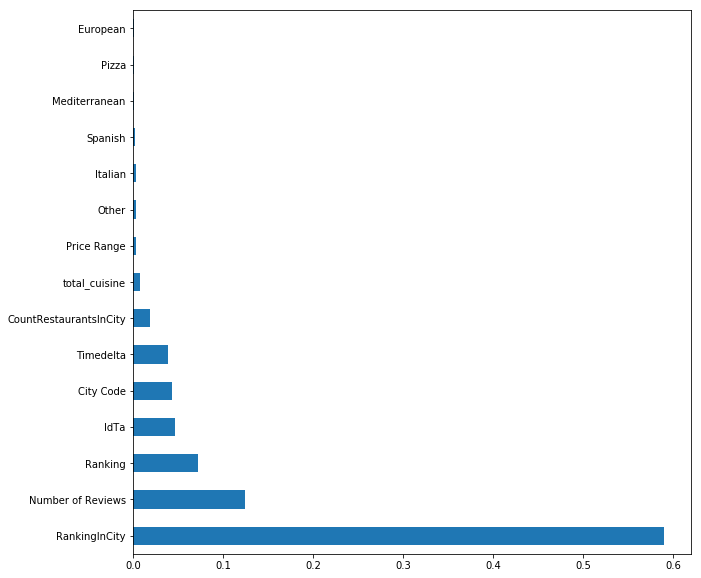

In [147]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10, 10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [148]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,City Code,CountRestaurantsInCity,RankingInCity,Bar,Pub,European,Scandinavian,Gluten Free Options,Vegetarian Friendly,Vegan Options,Italian,Mediterranean,Seafood,French,Cafe,Fast Food,Portuguese,Other,Greek,Czech,Eastern European,Central European,Pizza,British,Spanish,Norwegian,African,Moroccan,Middle Eastern,Halal,Indian,Thai,Dutch,Welsh,American,Steakhouse,Soups,Scottish,Fusion,Street Food,Hungarian,Asian,Wine Bar,Barbecue,Central American,Peruvian,South American,Irish,Polish,Vietnamese,Lebanese,Turkish,Healthy,Japanese,Sushi,Austrian,Chinese,Danish,International,Gastropub,Korean,German,Contemporary,Arabic,Diner,Swiss,Swedish,Persian,Australian,Grill,Mexican,Latin,Belgian,Argentinean,Tunisian,Russian,Nepali,Bangladeshi,Colombian,Sri Lankan,Pakistani,Brew Pub,Israeli,Brazilian,Delicatessen,Kosher,Ethiopian,Taiwanese,Indonesian,Malaysian,Venezuelan,Balti,Armenian,Slovenian,Caribbean,Jamaican,Ecuadorean,Chilean,Hawaiian,Minority Chinese,Croatian,Cambodian,Afghani,Tibetan,Romanian,Southwestern,Mongolian,Cajun & Creole,Singaporean,Filipino,Cuban,Native American,Canadian,Egyptian,Azerbaijani,Georgian,Yunnan,New Zealand,Ukrainian,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,total_cuisine,Timedelta,IdTa
7802,596.0,2,100.0,0.0,23,488,1.221311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13329521
9990,1307.0,1,67.0,0.0,26,2589,0.504828,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,43,10109492
7048,2270.0,2,75.0,0.0,6,1021,2.223310,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,4301283
3026,2806.0,2,73.0,0.0,19,3813,0.735903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,20,3864708
7679,613.0,2,72.0,0.0,0,1372,0.446793,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36,1501440
5835,847.0,2,239.0,0.0,2,3395,0.249485,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,8,8868553
6988,1292.0,2,250.0,0.0,20,2694,0.479584,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,86,2413067
720,7794.0,2,136.0,0.0,2,3395,2.295729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,13223254
3359,6357.0,2,13.0,0.0,16,7193,0.883776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [149]:
test_data = test_data.drop(['Rating'], axis=1)

In [150]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [151]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [153]:
for i in range(len(predict_submission)):
    predict_submission[i] = fine_rating_pred(predict_submission[i])

predict_submission

array([3. , 4.5, 4. , ..., 3. , 4.5, 4. ])

In [ ]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
